In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("../train_data.tsv", delimiter='\t')
data.head(n=5)

,insert_chrom,insert_name,sequence,rna_dna_ratio,is_active
0,chr16,chr16:22572551-22572821,GTTCTCTATGCCATCTCACATTTATCCCCAAAGCCCAGGGAGGCTG...,1.179811,1
1,chr18,chr18:46761035-46761305,CAAAACATGGAGGTCTGAAGTCCCTTTTGTTCCTATCAGTATGGAG...,1.406439,1
2,chr1,chr1:209485218-209485488,TGTGGGAACAAGGAAGGAGTTAAGTTGGCATAAGCAGTTTAATAAG...,1.021255,0
3,chr3,chr3:45119427-45119697,TGCCCTATCTTGGATTCTGATTATGAGTCTCCGGGCAGCTGATGGC...,0.817915,0
4,chr14,chr14:51481635-51481905,GGTTTCCTTCGATCACCCAAGCTGGCTATTATTATCGTTCTTACAC...,0.756986,0


In [6]:
# make sure all sequences valid
valid_sequences = data["sequence"].str.contains('^[GTCA]+$', regex=True)
assert len(valid_sequences) == len(data)


In [7]:
# counting values in classification
data["is_active"].value_counts()

is_active
1    21776
0    19957
Name: count, dtype: int64

1.04727804395632


(array([  1.,   2.,   3.,   6.,  13.,  14.,  39.,  58.,  86., 104., 133.,
        171., 152., 214., 253., 259., 275., 343., 378., 454., 428., 479.,
        504., 474., 497., 545., 559., 571., 575., 558., 538., 525., 530.,
        575., 538., 566., 539., 571., 600., 556., 548., 563., 590., 602.,
        624., 667., 633., 681., 687., 676.]),
 array([0.11285098, 0.13153952, 0.15022806, 0.16891661, 0.18760515,
        0.20629369, 0.22498223, 0.24367077, 0.26235931, 0.28104785,
        0.29973639, 0.31842494, 0.33711348, 0.35580202, 0.37449056,
        0.3931791 , 0.41186764, 0.43055618, 0.44924472, 0.46793327,
        0.48662181, 0.50531035, 0.52399889, 0.54268743, 0.56137597,
        0.58006451, 0.59875305, 0.6174416 , 0.63613014, 0.65481868,
        0.67350722, 0.69219576, 0.7108843 , 0.72957284, 0.74826138,
        0.76694993, 0.78563847, 0.80432701, 0.82301555, 0.84170409,
        0.86039263, 0.87908117, 0.89776971, 0.91645826, 0.9351468 ,
        0.95383534, 0.97252388, 0.99121242, 1.

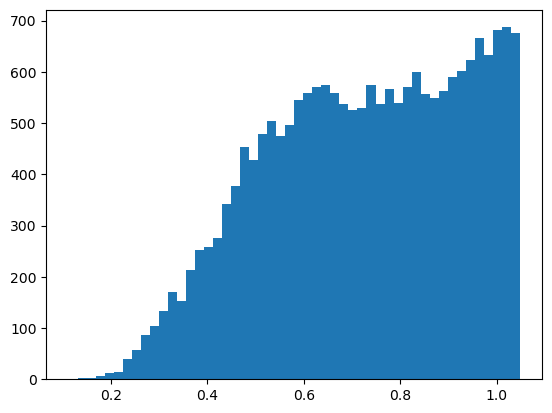

In [8]:
# regression
print(max(data[data['is_active'] == 0]["rna_dna_ratio"]))
plt.hist(data[data['is_active'] == 0]["rna_dna_ratio"], bins=50)

1.04740291631518


(array([1.639e+03, 1.743e+03, 1.861e+03, 1.955e+03, 1.967e+03, 1.881e+03,
        1.682e+03, 1.466e+03, 1.348e+03, 1.201e+03, 9.460e+02, 7.980e+02,
        6.760e+02, 5.440e+02, 4.260e+02, 3.460e+02, 2.960e+02, 2.220e+02,
        1.670e+02, 1.380e+02, 1.060e+02, 8.800e+01, 6.000e+01, 5.800e+01,
        3.400e+01, 3.000e+01, 2.100e+01, 1.900e+01, 1.200e+01, 9.000e+00,
        2.000e+00, 5.000e+00, 5.000e+00, 5.000e+00, 8.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.04740292, 1.08826047, 1.12911803, 1.16997559, 1.21083314,
        1.2516907 , 1.29254825, 1.33340581, 1.37426337, 1.41512092,
        1.45597848, 1.49683604, 1.53769359, 1.57855115, 1.61940871,
        1.66026626, 1.70112382, 1.74198138, 1.78283893, 1.82369649,
        1.86455405, 1.9054116 , 1.94626916, 1.98712671, 2.02798427,
        2.06884183, 2.10969938, 2.15

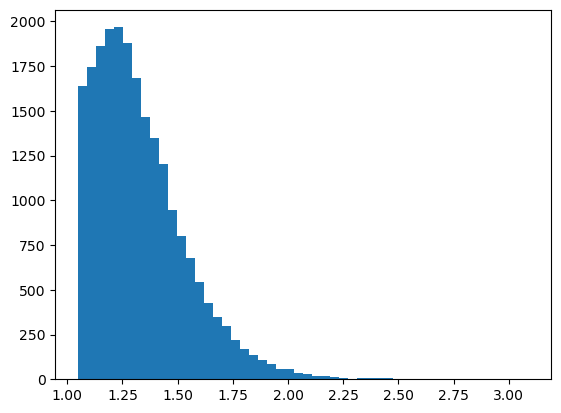

In [9]:
# regression
print(min(data[data['is_active'] == 1]["rna_dna_ratio"]))
plt.hist(data[data['is_active'] == 1]["rna_dna_ratio"], bins=50)

## Notes
* classes are balanced
* regression plots are interesting, it looks that distributions are totaly diferent values don't intersect when conditioned on `in_active` class